In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

from uoineuro.utils import (calculate_selection_ratio,
                            plot_difference_distribution)
%matplotlib inline

In [2]:
base_path = os.path.join(os.environ['HOME'], 'fits/uoineuro/coupling')

In [3]:
a1_results_path = os.path.join(base_path, 'ecog/ecog_coupling.h5')
a1_results = h5py.File(a1_results_path, 'r')
a1_lasso_ccs = np.median(a1_results['lasso/coupling_coefs'],
                           axis=0)
a1_uoi_ccs = np.median(a1_results['uoi_lasso_bic/coupling_coefs'],
                         axis=0)

In [4]:
v1_results_paths = [os.path.join(base_path, 'pvc11/pvc11_monkey1_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey2_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey3_coupling.h5')]
v1_results = [h5py.File(v1_results_path, 'r')
              for v1_results_path in v1_results_paths]

v1_lasso_ccs = [np.median(v1_result['glmnet_poisson/coupling_coefs'], axis=0)
                for v1_result in v1_results]
v1_uoi_ccs = [np.median(v1_result['uoi_poisson_bic/coupling_coefs'], axis=0)
              for v1_result in v1_results]

In [5]:
m1_results_path = os.path.join(base_path, 'nhp/nhp_indy_20160407_02_coupling.h5')
m1_results = h5py.File(m1_results_path, 'r')
m1_lasso_ccs = np.median(m1_results['glmnet_poisson/coupling_coefs'], axis=0)
m1_uoi_ccs = np.median(m1_results['uoi_poisson_bic/coupling_coefs'], axis=0)

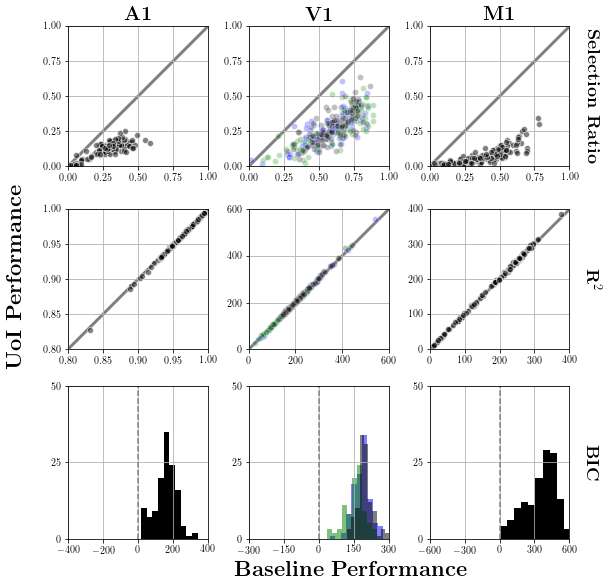

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# selection ratios
axes[0, 0].scatter(
    calculate_selection_ratio(a1_lasso_ccs),
    calculate_selection_ratio(a1_uoi_ccs),
    alpha=0.5,
    color='k',
    edgecolor='w')

colors = ['b', 'g', 'k']
[axes[0, 1].scatter(
    calculate_selection_ratio(v1_lasso_ccs[idx]),
    calculate_selection_ratio(v1_uoi_ccs[idx]),
    alpha=0.25,
    color=colors[idx],
    edgecolor='w') for idx in range(3)]

axes[0, 2].scatter(
    calculate_selection_ratio(m1_lasso_ccs),
    calculate_selection_ratio(m1_uoi_ccs),
    alpha=0.5,
    color='k',
    edgecolor='w')

for ax in axes[0]:
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    
# predictive performances
axes[1, 0].scatter(
    np.median(a1_results['lasso/r2s_test'], axis=0),
    np.median(a1_results['uoi_lasso_bic/r2s_test'], axis=0),
    alpha=0.5,
    color='k',
    edgecolor='w')
axes[1, 0].set_xlim([0.80, 1.])
axes[1, 0].set_xticks([0.8, 0.85, 0.9, 0.95, 1])
axes[1, 0].set_yticks([0.8, 0.85, 0.9, 0.95, 1])

[axes[1, 1].scatter(
    np.median(v1_results[idx]['glmnet_poisson/deviances_test'], axis=0),
    np.median(v1_results[idx]['uoi_poisson_bic/deviances_test'], axis=0),
    alpha=0.25,
    color=colors[idx],
    edgecolor='w') for idx in range(3)]
axes[1, 1].set_xlim([0, 600.])
axes[1, 1].set_xticks([0, 200, 400, 600])
axes[1, 1].set_yticks([0, 200, 400, 600])

axes[1, 2].scatter(
    np.median(m1_results['glmnet_poisson/deviances_test'], axis=0),
    np.median(m1_results['uoi_poisson_bic/deviances_test'], axis=0),
    alpha=0.5,
    color='k',
    edgecolor='w')
axes[1, 2].set_xlim([0, 400.])
axes[1, 2].set_xticks([0, 100, 200, 300, 400])
axes[1, 2].set_yticks([0, 100, 200, 300, 400])

for ax in axes[:2].ravel():
    ax.set_ylim(ax.get_xlim())
    ax.plot(ax.get_xlim(), ax.get_xlim(),
            color='gray', 
            linewidth=3,
            zorder=-1)
    ax.set_aspect('equal')
    ax.grid('on')
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=10)
    
# model parsimony
plot_difference_distribution(a1_results['lasso'],
                             [a1_results['uoi_lasso_bic']],
                             metrics=['bics'],
                             fax=(fig, np.array([[axes[2, 0]]])),
                             color='black',
                             alpha=1.)

[plot_difference_distribution(v1_results[idx]['glmnet_poisson'],
                             [v1_results[idx]['uoi_poisson_bic']],
                             metrics=['bics'],
                             fax=(fig, np.array([[axes[2, 1]]])),
                             color=colors[idx]) for idx in range(3)]

plot_difference_distribution(m1_results['glmnet_poisson'],
                             [m1_results['uoi_poisson_bic']],
                             metrics=['bics'],
                             fax=(fig, np.array([[axes[2, 2]]])),
                             color='black',
                             alpha=1.)

axes[2, 0].set_xlim([-400, 400])
axes[2, 0].set_xticks([-400, -200, 0, 200, 400])
axes[2, 1].set_xlim([-300, 300])
axes[2, 1].set_xticks([-300, -150, 0, 150, 300])
axes[2, 2].set_xlim([-600, 600])
axes[2, 2].set_xticks([-600, -300, 0, 300, 600])

for ax in axes[2]:
    ax.axvline(0, linestyle='--', color='gray')
    ax.set_ylim([0, 50])
    ax.set_yticks([0, 25, 50])
    ax.grid('on')
    ax.tick_params(labelsize=10)

# labels
axes[0, 0].set_title(r'\textbf{A1}', fontsize=20)
axes[0, 1].set_title(r'\textbf{V1}', fontsize=20)
axes[0, 2].set_title(r'\textbf{M1}', fontsize=20)

# metric labels
axes[0, -1].set_ylabel(
    r'\textbf{Selection Ratio}',
    fontsize=18,
    labelpad=30,
    rotation=270)
axes[1, -1].set_ylabel(
    r'$\mathbf{R}^2$',
    fontsize=18,
    labelpad=30,
    rotation=270)
axes[2, -1].set_ylabel(
    r'\textbf{BIC}',
    fontsize=18,
    labelpad=30,
    rotation=270)
axes[0, -1].yaxis.set_label_position('right')
axes[1, -1].yaxis.set_label_position('right')
axes[2, -1].yaxis.set_label_position('right')

fig.text(
    x=0.55, y=-0.01,
    s=r'\textbf{Baseline Performance}',
    fontsize=22,
    horizontalalignment='center',
    verticalalignment='center')

fig.text(
    x=-0.03, y=0.5,
    s=r'\textbf{UoI Performance}',
    fontsize=22,
    rotation=90,
    horizontalalignment='center',
    verticalalignment='center')

plt.tight_layout()